# FIT5120 Iteration 01
## Data Cleaning and Reshaping

#### Author: Akshatha Shivashankar Chindalur
#### Student ID: 29996503

Date: 18/05/2020

Version: 2.0

Environment: Python 3.7.3 and Jupyter notebook

Libraries used: 

* pandas (for accessing and modifying data in csv files, included in Anaconda Python 3.7) 
* numpy (for solving simultaneous equations, included in Anaconda Python 3.7) 
* glob (for reading and writing files into the system, included in Anaconda Python 3.7)
* os (for manipulating file structure, included in Anaconda Python 3.7)

In [1]:
# intialising the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
#   This function replaces missing values in the columns Condition and Year.
#   It extracts the value from the previous and substiutes the missing value
#   in the current row.
#
#   :param missing_df:   the dataframe with missing values in the columns
#
#   :return missing_df:  the dataframe with missing values replaces accordingly.

def fill_infection_year(missing_df):

    n = len(missing_df)
    for i in range(1, n):
        
        # checks for a missing value
        if(str(missing_df.loc[i, 'Condition'])=='nan' or missing_df.loc[i, 'Condition'] == None):
            # replaces from the previous row
            missing_df.loc[i, 'Condition'] = missing_df.loc[i-1, 'Condition']
        if(missing_df.loc[i, 'Year'] == 0):
            missing_df.loc[i, 'Year'] = missing_df.loc[i-1, 'Year']
            
    return missing_df

In [3]:
#   This function divides the dataframe based on the gender of the observation.
#
#   :param sex_df:   the dataframe with mixed genders.
#
#   :return total, female, male:  the dataframes seperated based on gender respectively.

def split_sex(sex_df):
    total = sex_df[sex_df['Sex']=='Total']
    female = sex_df[sex_df['Sex']=='Female']
    male = sex_df[sex_df['Sex']=='Male']
    
    return total, female, male

In [4]:
#   This function transforms the long dataset into a wide dataset. 
#   It also gets rid of unnecessary columns.
#
#   :param long_df:   the lengthy dataframe
#
#   :return long_df:  the transformed dataframe.

def pivot_df(long_df):
   
    long_df = long_df.drop(['Sex'], axis=1)
    long_df = long_df.pivot(index='Condition', columns='Year', values='Notified Cases')
    long_df = long_df.reset_index()
    del long_df.columns.name
    long_df.columns = long_df.columns.astype(str)
    long_df = long_df.replace({0.0: np.nan})
    long_df = long_df.dropna(thresh=2)
    long_df = long_df.reset_index(drop=True)
    
    return long_df

In [5]:
#   This function writes the cleaned dataframe into a CSV file. 
#
#   :param filename:   the name of the CSV file
#          total, female, male: the cleanded and seperated (by gender) dataframes.
#

def write_dataframe(filename, total, female, male):
    
    path = './../data/clean_data/notified_cases/'
    total.to_csv(os.path.join(path + 'total', filename + '_total.csv'), index=False)
    female.to_csv(os.path.join(path + 'female', filename + '_female.csv'), index=False)
    male.to_csv(os.path.join(path + 'male', filename + '_male.csv'), index=False)

In [6]:
# reading all the infections datasets from different regions
infection_files = glob.glob('./../data/raw_data/notified_cases/infectious_diseases_*.xls')
                    
for file in  infection_files:
    region_df = pd.read_excel(file, header=None, skiprows=9, usecols = [1,4,5,8])
    region_df.columns = ['Condition', 'Year', 'Sex', 'Notified Cases']
    region_df['Year'] = region_df['Year'].fillna(0)
    region_df = region_df.astype({'Year': int})
    region_df = fill_infection_year(region_df)
    df_total, df_female, df_male = split_sex(region_df)
    df_total = pivot_df(df_total)
    df_female = pivot_df(df_female)
    df_male = pivot_df(df_male)
    
    filename = os.path.splitext(file)[0]
    filename = filename.split('/')[5]
    write_dataframe(filename, df_total, df_female, df_male)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
# read the cleaned files of regional Victoria
gippsland = pd.read_csv('./../data/clean_data/notified_cases/total/infectious_diseases_Gippsland_total.csv')
grampians = pd.read_csv('./../data/clean_data/notified_cases/total/infectious_diseases_Grampians_total.csv')
hume = pd.read_csv('./../data/clean_data/notified_cases/total/infectious_diseases_Hume_total.csv')
loddon = pd.read_csv('./../data/clean_data/notified_cases/total/infectious_diseases_LoddonMallee_total.csv')

In [8]:
# replace NaN with zeros
gippsland = gippsland.fillna(0)
grampians = grampians.fillna(0)
hume = hume.fillna(0)
loddon = loddon.fillna(0)

In [9]:
# extract the infections in each region
r1 = gippsland['Condition'].tolist()
r2 = grampians['Condition'].tolist()
r3 = hume['Condition'].tolist()
r4 = loddon['Condition'].tolist()

In [10]:
# obtain the intersection of the infection from the regions (common infections)
common_infec = list(set(r1) & set(r2) & set(r3) & set(r4))

In [11]:
# the sum of cases for the common infections is calculated
totals = []

for i in range(0, len(common_infec)):
    count_1 = gippsland.loc[gippsland['Condition'] == common_infec[i]]['2017'].values[0]
    count_2 = grampians.loc[grampians['Condition'] == common_infec[i]]['2017'].values[0]
    count_3 = hume.loc[hume['Condition'] == common_infec[i]]['2017'].values[0]
    count_4 = loddon.loc[loddon['Condition'] == common_infec[i]]['2017'].values[0]

    totals.append(count_1 + count_2 + count_3 + count_4)

<BarContainer object of 9 artists>

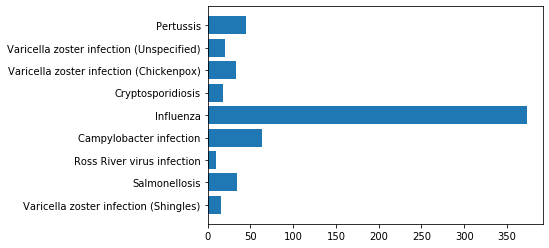

In [12]:
# a plot showing the infections and the total number of cases
fig, ax = plt.subplots()
ax.barh(common_infec, totals)